# Neural Networks & Deep Learning HomeWork 02
This is the second homework of NNDL course  
By  
* Ali Ranjbari, 810198570
* AmirHossein Alizad, 810197000

## 0. Importing and define some utils functions

In [1]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 24.9 MB/s 


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchmetrics
from torchmetrics.functional.classification import (
    multiclass_accuracy,
    multiclass_precision,
    multiclass_f1_score)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device is {device}')

device is cuda


First some utils fucntion

In [4]:
def train(model, dataset, criterion, optimizer, num_epochs, batch_size, verbose=True) -> dict:
  
  data_loader = torch.utils.data.DataLoader(dataset,
                                                 batch_size=batch_size,
                                                 shuffle=True)


  results = {'accuracy':[], 'loss':[], 'precision':[], 'f1_score':[]}
  n_total_steps = len(data_loader)
  for epoch in range(num_epochs):
    if verbose:
      print(f"***** Epoch {epoch+1} of {num_epochs} *****")
      
    for i, (images, labels) in enumerate(data_loader):
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      
    
    # Add accuracy, precision, F1
    preds = []
    y = []
    with torch.no_grad():
      for (i, l) in data_loader:
        i = i.to(device)
        l = l.to(device)

        preds.append(model(i))
        y.append(l)


    preds = torch.concat(preds, dim=0)
    y = torch.concat(y, dim=0)
    acc = multiclass_accuracy(preds, y, num_classes=10).item()
    prec = multiclass_precision(preds, y, num_classes=10).item()
    f1 = multiclass_f1_score(preds, y, num_classes=10).item()
    results['accuracy'].append(acc)
    results['loss'].append(loss.item())
    results['precision'].append(prec)
    results['f1_score'].append(f1)
    if verbose:
      print(f"Total Loss : {loss.item():.4f}")
      print(f"Accuracy   : {acc*100:.2f} %")
      print(f"Precision  : {prec*100:.2f} %")
      print(f"F1 score   : {f1*100:.2f} %\n")
  return results
    

In [5]:
def test(model, dataset, batch_size, verbose=False):

  data_loader = torch.utils.data.DataLoader(dataset,
                                                batch_size=batch_size,
                                                shuffle=True)

  preds = []
  y = []
  with torch.no_grad():
    for (i, l) in data_loader:
      i = i.to(device)
      l = l.to(device)

      preds.append(model(i))
      y.append(l)


  preds = torch.concat(preds, dim=0)
  y = torch.concat(y, dim=0)
  acc = multiclass_accuracy(preds, y, num_classes=10).item()
  prec = multiclass_precision(preds, y, num_classes=10).item()
  f1 = multiclass_f1_score(preds, y, num_classes=10).item()


  if verbose:
    print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, F1 Score: {f1:.2f}")

  return acc, prec, f1

In [6]:
def show_image(img):
  npimg = img.numpy()
  np_tr = np.transpose(npimg, (1,2,0))
  print(np_tr.shape)
  plt.imshow(np_tr)
  plt.show()
def show_labels(labels):
  names = []
  for i in labels:
    names.append(classes[i.item()])
  return names

## 1. Effects of Varying Resolution on Performance of **CNN** based Image Classification

In [63]:
transform32 = transforms.Compose([
    transforms.ToTensor(),
])
transform16 = transforms.Compose([
    # transforms.ToTensor(),
    transforms.Resize(16)
])
transform8 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(8)
])

In [60]:
train_cifar = torchvision.datasets.CIFAR10(root="./data", train=True,
                                                  download=True, transform=transform32)
test_cifar = torchvision.datasets.CIFAR10(root="./data", train=False,
                                                  download=True, transform=transform32)

Files already downloaded and verified
Files already downloaded and verified


In [61]:
all_cifar = torch.utils.data.ConcatDataset([train_cifar, test_cifar])

In [66]:
# all_cifar16. = transform16(all_cifar.data)
torch.utils.Data

AttributeError: ignored

In [44]:
cifar_train_dataset32 = torchvision.datasets.CIFAR10(root="./data", train=True,
                                                  download=True, transform=transform32)
cifar_test_dataset32 = torchvision.datasets.CIFAR10(root="./data", train=False,
                                                  download=True, transform=transform32)
cifar_train_dataset16 = torchvision.datasets.CIFAR10(root="./data", train=True,
                                                  download=True, transform=transform16)
cifar_test_dataset16 = torchvision.datasets.CIFAR10(root="./data", train=False,
                                                  download=True, transform=transform16)
cifar_train_dataset8 = torchvision.datasets.CIFAR10(root="./data", train=True,
                                                  download=True, transform=transform8)
cifar_test_dataset8 = torchvision.datasets.CIFAR10(root="./data", train=False,
                                                  download=True, transform=transform8)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


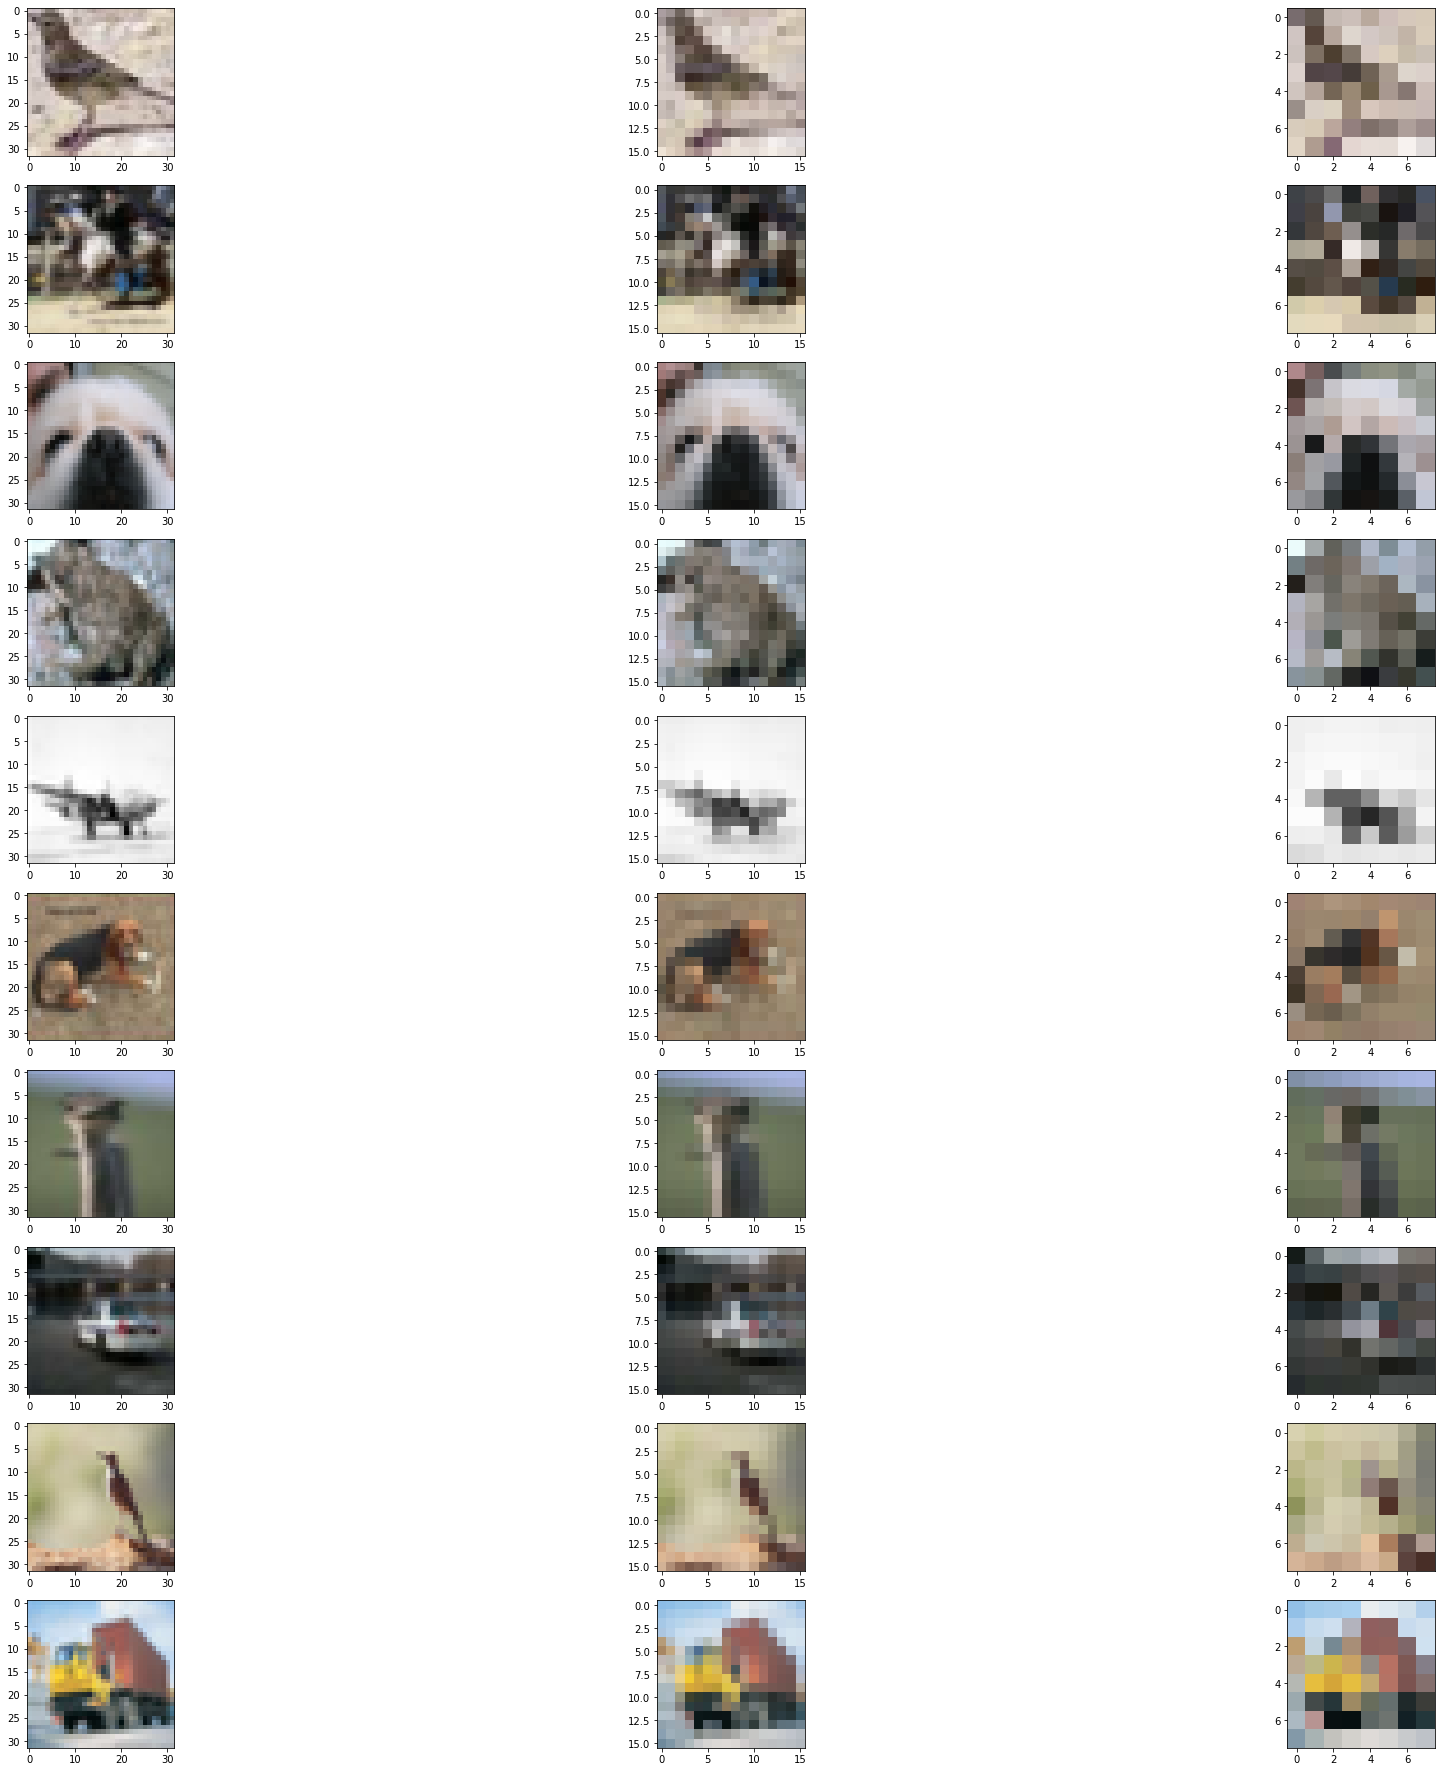

In [45]:
rand_idx = torch.randint(0,1000, (10,))
figure, axis = plt.subplots(10, 3, figsize=(32,32))
for i in range(10):
  idx = torch.randint(0,1000, (1,)).item()
  # getting images
  img_32 = cifar_train_dataset32[idx][0].numpy()
  img_16 = cifar_train_dataset16[idx][0].numpy()
  img_8 = cifar_train_dataset8[idx][0].numpy()
  # transpose
  img_32 = np.transpose(img_32, (1,2,0))
  img_16 = np.transpose(img_16, (1,2,0))
  img_8 = np.transpose(img_8, (1,2,0))
  # plot
  axis[i,0].imshow(img_32)
  axis[i,1].imshow(img_16)
  axis[i,2].imshow(img_8)

# plt.subplots_adjust(wspace=-1,hspace=0)
plt.show()

Train test validation splits
it is 84% train and 16% test

In [46]:
print("train dataset size: ", len(cifar_train_dataset32))
print("test datset size:", len(cifar_test_dataset32))
print(len(cifar_train_dataset32)/(len(cifar_train_dataset32)+len(cifar_test_dataset32)))

train dataset size:  50000
test datset size: 10000
0.8333333333333334


### Define the model


In [32]:
# pool_test = nn.MaxPool2d(2, 2)
# in_tensor = torch.randint(1,4, (1, 7,7), dtype=torch.float)
# print(in_tensor)
# print(pool_test(in_tensor))
int(7/2)

3

In [34]:
class cifar_CNN(nn.Module):
  def __init__(self, input_size = 32):
    super().__init__()

    #layer 1, Conv
    self.conv1_1 = nn.Conv2d(3, 32, 3)    
    self.conv1_2 = nn.Conv2d(32, 32, 3)   
    self.conv1_3 = nn.Conv2d(32, 32, 3)   
    self.pool1 = nn.MaxPool2d(2, 2)       
    self.dropout1 = nn.Dropout(0.25)
  
    self.output_size = int((input_size-6)/2)

    # layer 2, Conv
    self.conv2_1 = nn.Conv2d(32, 64, 3)   
    self.conv2_2 = nn.Conv2d(64, 64, 3)   
    self.conv2_3 = nn.Conv2d(64, 64, 3)   
    self.pool2 = nn.MaxPool2d(2, 2)       
    self.dropout2 = nn.Dropout(0.25)

    self.output_size = int((self.output_size-6)/2)

    # layer 3, Linear    
    self.fc3 = nn.Linear(64*self.output_size*self.output_size, 512)   
    self.dropout3 = nn.Dropout(0.5)
    
    # layer 4, Output
    self.fc4 = nn.Linear(512, 10)
    

  def forward(self, x):
    
    # layer 1, Conv
    x = F.relu(self.conv1_1(x))
    x = F.relu(self.conv1_2(x))
    x = F.relu(self.conv1_3(x))
    x = self.dropout1(self.pool1(x))

    # layer 2, Conv2
    x = F.relu(self.conv2_1(x))
    x = F.relu(self.conv2_2(x))
    x = F.relu(self.conv2_3(x))
    x = self.dropout2(self.pool2(x))


    x = x.view(-1, 64*self.output_size*self.output_size)
    # layer 3, Linear
    x = F.relu(self.fc3(x))
    x = self.dropout3(x)

    # conv 4, Output
    x = self.fc4(x)
    
    return x



### Train

#### Train with **TOTV** method
In this method we train on original dataset and test on varying dataset

In [ ]:
totv_model = cifar_CNN(input_size=32).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(totv_model.parameters(), lr=0.002)

results = train(
              totv_model,
              cifar_train_dataset32,
              criterion,
              optimizer,
              num_epochs = 50,
              batch_size = 128,
              verbose=True)

# saving the modle
torch.save(totv_model.state_dict(), f"./cifar_model_totv{results['accuracy'][-1]:.2f}")

#### Train with **TVTV** method
In this method we train and test on varying dataset

In [36]:
tvtv_model = cifar_CNN(input_size=32).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(tvtv_model.parameters(), lr=0.002)

results = train(
              tvtv_model,
              cifar_train_dataset32,
              criterion,
              optimizer,
              num_epochs = 50,
              batch_size = 128,
              verbose=True)

# saving the modle
torch.save(tvtv_model.state_dict(), f"./cifar_model_tvtv{results['accuracy'][-1]:.2f}")

***** Epoch 1 of 50 *****
Total Loss : 1.6006
Accuracy   : 37.74 %
Precision  : 38.13 %
F1 score   : 35.35 %

***** Epoch 2 of 50 *****
Total Loss : 1.5556
Accuracy   : 44.80 %
Precision  : 49.35 %
F1 score   : 45.24 %

***** Epoch 3 of 50 *****
Total Loss : 1.1445
Accuracy   : 53.09 %
Precision  : 52.09 %
F1 score   : 51.59 %

***** Epoch 4 of 50 *****
Total Loss : 1.4154
Accuracy   : 55.90 %
Precision  : 56.38 %
F1 score   : 55.70 %

***** Epoch 5 of 50 *****
Total Loss : 1.2114
Accuracy   : 59.21 %
Precision  : 58.57 %
F1 score   : 58.48 %

***** Epoch 6 of 50 *****
Total Loss : 1.3550
Accuracy   : 60.81 %
Precision  : 61.41 %
F1 score   : 60.37 %

***** Epoch 7 of 50 *****
Total Loss : 1.1013
Accuracy   : 62.65 %
Precision  : 63.06 %
F1 score   : 62.64 %

***** Epoch 8 of 50 *****
Total Loss : 1.0642
Accuracy   : 61.17 %
Precision  : 61.99 %
F1 score   : 60.48 %

***** Epoch 9 of 50 *****
Total Loss : 0.8700
Accuracy   : 64.61 %
Precision  : 65.13 %
F1 score   : 64.43 %

***** Epoc

## 2. Introduction to **CNN**

### Load dataset

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True,
                                                  download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False,
                                                  download=True, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = 16,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size = 16,
                                           shuffle=True)

In [ ]:
classes = train_dataset.classes

First see some examples of dataset

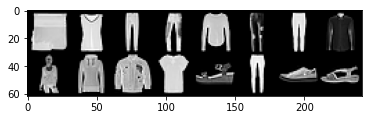

['Bag', 'Shirt', 'Trouser', 'Trouser', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
['Pullover', 'Pullover', 'Coat', 'Shirt', 'Sandal', 'Trouser', 'Sneaker', 'Sandal']


In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
show_image(torchvision.utils.make_grid(images))
labels_name = show_labels(labels)
top_half = labels_name[:8]
bottom_half = labels_name[8:]
print(top_half)
print(bottom_half)

### Make two different CNN architecture

First architecture is the **first** architecture that introduced in the **"CNN Model for Image Classification on MNIST and Fashion-MNIST Datast"** paper

In [ ]:
class CNN1(nn.Module):

  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 10)
    self.dropout = nn.Dropout(0.2)
    

  def forward(self, x):
    x =  x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = self.dropout(self.fc2(x))
    return x


Second selected architecture is the **fifth** architecture from the paper

In [ ]:
class CNN2(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)    # input: 28*28 
    self.conv2 = nn.Conv2d(32, 32, 3)   # input: 26*26
    self.pool1 = nn.MaxPool2d(2, 2)     # input: 24*24
    self.dropout1 = nn.Dropout(0.25)
    self.conv3 = nn.Conv2d(32, 64, 3)   # input: 12*12
    self.conv4 = nn.Conv2d(64, 64, 3)   # input: 10*10
    self.pool2 = nn.MaxPool2d(2,2)      # input: 8*8
    self.dropout2 = nn.Dropout(0.25)
    self.fc1 = nn.Linear(64*4*4, 512)   # input: 4*4
    self.dropout3 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(512, 10)
    

  def forward(self, x):
    
    # conv1
    x = F.relu(self.conv1(x))

    # conv2
    x = F.relu(self.conv2(x))
    x = self.dropout1(self.pool1(x))

    # conv3
    x = F.relu(self.conv3(x))

    # conv 4
    x = F.relu(self.conv4(x))
    x = self.dropout2(self.pool2(x))

    # fully connected layers
    x = x.view(-1, 64*4*4)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    

    return x



### Training 

First define a function `train` which will be use for training each model with desired parameters

#### 1. First architecture

In [ ]:
model1 = CNN1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.002)

results = train(
              model1,
              train_dataset,
              criterion,
              optimizer,
              num_epochs = 100,
              batch_size = 64,
              verbose=True)

# saving the model
torch.save(model1.state_dict(), f"./model1_{results['accuracy']}")

***** Epoch 1 of 100 *****
Total Loss : 0.6075
Accuracy   : 73.87 %
Precision  : 76.28 %
F1 score   : 73.73 %

***** Epoch 2 of 100 *****
Total Loss : 0.8600
Accuracy   : 77.14 %
Precision  : 78.29 %
F1 score   : 77.20 %

***** Epoch 3 of 100 *****
Total Loss : 0.5958
Accuracy   : 77.50 %
Precision  : 79.02 %
F1 score   : 77.65 %

***** Epoch 4 of 100 *****
Total Loss : 0.6373
Accuracy   : 77.73 %
Precision  : 79.37 %
F1 score   : 77.94 %

***** Epoch 5 of 100 *****
Total Loss : 0.4103
Accuracy   : 78.10 %
Precision  : 79.96 %
F1 score   : 78.27 %

***** Epoch 6 of 100 *****
Total Loss : 0.8433
Accuracy   : 78.34 %
Precision  : 79.73 %
F1 score   : 78.68 %

***** Epoch 7 of 100 *****
Total Loss : 0.2075
Accuracy   : 79.33 %
Precision  : 80.68 %
F1 score   : 79.66 %

***** Epoch 8 of 100 *****
Total Loss : 0.5965
Accuracy   : 79.42 %
Precision  : 80.87 %
F1 score   : 79.64 %

***** Epoch 9 of 100 *****
Total Loss : 0.3194
Accuracy   : 79.69 %
Precision  : 80.83 %
F1 score   : 79.92 %

*

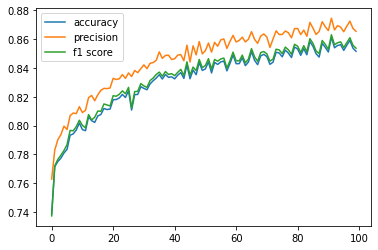

In [ ]:
plt.plot(results['accuracy'], label="accuracy")
plt.plot(results['precision'], label="precision")
plt.plot(results['f1_score'], label="f1 score")
plt.legend()
plt.show()

#### 2. Second architecture

In [ ]:
model2 = CNN2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model2.parameters(), lr=0.002)

results = train(
              model2,
              train_dataset,
              criterion,
              optimizer,
              num_epochs = 50,
              batch_size = 128,
              verbose=True)

# saving the modle
torch.save(model2.state_dict(), f"./model2_{results['accuracy'][-1]:.2f}")

***** Epoch 1 of 50 *****
Total Loss : 0.5842
Accuracy   : 76.88 %
Precision  : 81.84 %
F1 score   : 76.89 %

***** Epoch 2 of 50 *****
Total Loss : 0.4037
Accuracy   : 84.32 %
Precision  : 84.62 %
F1 score   : 83.96 %

***** Epoch 3 of 50 *****
Total Loss : 0.2090
Accuracy   : 87.01 %
Precision  : 86.88 %
F1 score   : 86.81 %

***** Epoch 4 of 50 *****
Total Loss : 0.3564
Accuracy   : 88.26 %
Precision  : 88.33 %
F1 score   : 87.92 %

***** Epoch 5 of 50 *****
Total Loss : 0.4191
Accuracy   : 88.03 %
Precision  : 89.17 %
F1 score   : 88.23 %

***** Epoch 6 of 50 *****
Total Loss : 0.2153
Accuracy   : 89.95 %
Precision  : 90.05 %
F1 score   : 89.82 %

***** Epoch 7 of 50 *****
Total Loss : 0.2865
Accuracy   : 90.55 %
Precision  : 90.78 %
F1 score   : 90.62 %

***** Epoch 8 of 50 *****
Total Loss : 0.1666
Accuracy   : 91.11 %
Precision  : 91.15 %
F1 score   : 91.00 %

***** Epoch 9 of 50 *****
Total Loss : 0.1665
Accuracy   : 90.91 %
Precision  : 91.19 %
F1 score   : 90.86 %

***** Epoc

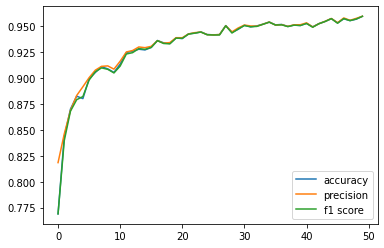

In [ ]:
plt.plot(results['accuracy'], label="accuracy")
plt.plot(results['precision'], label="precision")
plt.plot(results['f1_score'], label="f1 score")
plt.legend()
plt.show()

In [ ]:
# loading the models 

model1 = CNN1().to(device)
model2 = CNN2().to(device)
model1.load_state_dict(torch.load("./model1_0.85"))
model2.load_state_dict(torch.load("./model2_0.96"))

print(model1.eval())
print(model2.eval())

CNN1(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
CNN2(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


### Test 
First define the `test` function to test owr trained model

Testing first model

In [ ]:
test(model1, test_dataset, 32, verbose=True)

Accuracy: 0.88, Precision: 0.88, F1 Score: 0.88


(0.8801000118255615, 0.8812204599380493, 0.8804230690002441)

In [ ]:
test(model2, test_dataset, 32, verbose=True)

Accuracy: 0.93, Precision: 0.93, F1 Score: 0.93


(0.9259999990463257, 0.9260851740837097, 0.9259423017501831)

### Different Optimizers
In this section we check two different optimizers for the two network above
The optimizers is:
1. SGD
2. Adam

#### First model using **SGD**

In [ ]:
model1_1 = CNN1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1_1.parameters(), lr=0.002)

results = train(
              model1_1,
              train_dataset,
              criterion,
              optimizer,
              num_epochs = 100,
              batch_size = 64,
              verbose=True)

# saving the model
torch.save(model1_1.state_dict(), f"./model1_1_{results['accuracy'][-1]:.2f}")

***** Epoch 1 of 100 *****
Total Loss : 1.5840
Accuracy   : 53.28 %
Precision  : 50.38 %
F1 score   : 49.02 %

***** Epoch 2 of 100 *****
Total Loss : 1.0354
Accuracy   : 56.79 %
Precision  : 54.68 %
F1 score   : 54.74 %

***** Epoch 3 of 100 *****
Total Loss : 1.2277
Accuracy   : 58.85 %
Precision  : 57.16 %
F1 score   : 57.14 %

***** Epoch 4 of 100 *****
Total Loss : 0.5663
Accuracy   : 61.39 %
Precision  : 60.75 %
F1 score   : 60.61 %

***** Epoch 5 of 100 *****
Total Loss : 0.7808
Accuracy   : 63.07 %
Precision  : 62.72 %
F1 score   : 62.53 %

***** Epoch 6 of 100 *****
Total Loss : 1.0064
Accuracy   : 64.88 %
Precision  : 64.91 %
F1 score   : 64.72 %

***** Epoch 7 of 100 *****
Total Loss : 0.6908
Accuracy   : 66.03 %
Precision  : 65.93 %
F1 score   : 65.77 %

***** Epoch 8 of 100 *****
Total Loss : 1.0844
Accuracy   : 67.40 %
Precision  : 67.61 %
F1 score   : 67.42 %

***** Epoch 9 of 100 *****
Total Loss : 0.7148
Accuracy   : 68.12 %
Precision  : 68.45 %
F1 score   : 68.19 %

*

OSError: ignored

#### First model using **Adam**  
This model is train in the default model above you can check above

#### Second model using **SGD**

In [ ]:
model2_1 = CNN2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2_1.parameters(), lr=0.002)

results = train(
              model2_1,
              train_dataset,
              criterion,
              optimizer,
              num_epochs = 50,
              batch_size = 128,
              verbose=True)

# saving the modle
torch.save(model2_1.state_dict(), f"./model2_1_{results['accuracy'][-1]:.2f}")

***** Epoch 1 of 50 *****
Total Loss : 2.3028
Accuracy   : 10.64 %
Precision  : 12.35 %
F1 score   : 3.59 %

***** Epoch 2 of 50 *****
Total Loss : 2.2916
Accuracy   : 12.80 %
Precision  : 35.77 %
F1 score   : 7.50 %

***** Epoch 3 of 50 *****
Total Loss : 2.2771
Accuracy   : 19.51 %
Precision  : 35.98 %
F1 score   : 14.97 %

***** Epoch 4 of 50 *****
Total Loss : 2.2170
Accuracy   : 25.08 %
Precision  : 34.41 %
F1 score   : 17.07 %

***** Epoch 5 of 50 *****
Total Loss : 1.2971
Accuracy   : 50.34 %
Precision  : 49.69 %
F1 score   : 47.69 %

***** Epoch 6 of 50 *****
Total Loss : 1.0730
Accuracy   : 57.90 %
Precision  : 58.59 %
F1 score   : 56.10 %

***** Epoch 7 of 50 *****
Total Loss : 0.9083
Accuracy   : 62.88 %
Precision  : 62.34 %
F1 score   : 60.63 %

***** Epoch 8 of 50 *****
Total Loss : 0.8540
Accuracy   : 65.41 %
Precision  : 64.51 %
F1 score   : 64.22 %

***** Epoch 9 of 50 *****
Total Loss : 0.8384
Accuracy   : 67.15 %
Precision  : 67.13 %
F1 score   : 65.80 %

***** Epoch 

#### Second model using **Adam**

In [ ]:
model2_2 = CNN2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2_2.parameters(), lr=0.002)

results = train(
              model2_2,
              train_dataset,
              criterion,
              optimizer,
              num_epochs = 50,
              batch_size = 128,
              verbose=True)

# saving the modle
torch.save(model2_2.state_dict(), f"./model2_2_{results['accuracy'][-1]:.2f}")

***** Epoch 1 of 50 *****
Total Loss : 2.2977
Accuracy   : 11.35 %
Precision  : 7.42 %
F1 score   : 4.61 %

***** Epoch 2 of 50 *****
Total Loss : 2.3020
Accuracy   : 12.86 %
Precision  : 8.41 %
F1 score   : 6.19 %

***** Epoch 3 of 50 *****
Total Loss : 2.2989
Accuracy   : 13.71 %
Precision  : 20.23 %
F1 score   : 6.70 %

***** Epoch 4 of 50 *****
Total Loss : 2.2935
Accuracy   : 12.86 %
Precision  : 14.08 %
F1 score   : 5.72 %

***** Epoch 5 of 50 *****
Total Loss : 2.2482
Accuracy   : 14.21 %
Precision  : 19.10 %
F1 score   : 7.25 %

***** Epoch 6 of 50 *****
Total Loss : 1.8964
Accuracy   : 41.48 %
Precision  : 38.20 %
F1 score   : 37.93 %

***** Epoch 7 of 50 *****
Total Loss : 1.0887
Accuracy   : 52.10 %
Precision  : 52.11 %
F1 score   : 50.08 %

***** Epoch 8 of 50 *****
Total Loss : 1.0914
Accuracy   : 59.13 %
Precision  : 58.42 %
F1 score   : 57.07 %

***** Epoch 9 of 50 *****
Total Loss : 0.9492
Accuracy   : 61.79 %
Precision  : 60.61 %
F1 score   : 60.80 %

***** Epoch 10 of